In [2]:
import timm
import torch
from PIL import Image
from torchvision import transforms

# Load the image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image

# Preprocess the image
def preprocess_image(image, image_size):
    preprocess = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Extract features using a given model
def extract_features(model_name, image_tensor):
    model = timm.create_model(model_name, pretrained=True)
    model.eval()
    with torch.no_grad():
        features = model.forward_features(image_tensor)
    return features

# Main function to extract features using ViT and AlexNet
def main(image_path):
    image = load_image(image_path)
    
    # ViT model
    vit_image_size = 224
    vit_image_tensor = preprocess_image(image, vit_image_size)
    vit_features = extract_features('vit_base_patch16_224', vit_image_tensor)
    print("ViT Features:", vit_features.shape)
    
    # AlexNet model
    alexnet_image_size = 224
    alexnet_image_tensor = preprocess_image(image, alexnet_image_size)
    alexnet_features = extract_features('alexnet', alexnet_image_tensor)
    print("AlexNet Features:", alexnet_features.shape)

# Example usage
# image_path = 'path_to_your_image.jpg'
# main(image_path)

/home/aaryan/penvs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image
def preprocess_image(image, image_size):
    preprocess = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

In [5]:
image_path = 'data/5.jpg'
image = Image.open(image_path).convert('RGB')
image_tensor = preprocess_image(image, 224)

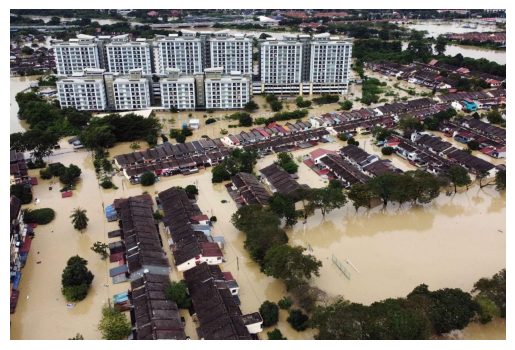

In [6]:
# Plot the image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
model_vit = timm.create_model('vit_base_patch16_224', pretrained=True)

In [7]:
with torch.no_grad():
    features_vit = model_vit.forward_features(image_tensor)

In [8]:
features_vit.shape

torch.Size([1, 197, 768])

In [13]:
# Extract the class token
class_token = features_vit[:, 0]
print(class_token.shape)

torch.Size([1, 768])


In [14]:
# Resize the class token to 16x16x3
class_token = torch.reshape(class_token, (16, 16, 3))
print(class_token.shape)

torch.Size([16, 16, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-8.680828..5.12577].


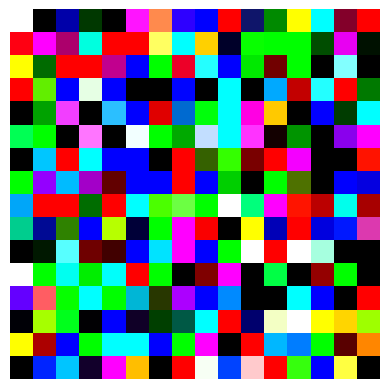

In [15]:
# Plot the class token
plt.imshow(class_token)
plt.axis('off')
plt.show()

In [16]:
idx = 10
patch = features_vit[:, idx]
print(patch.shape)

torch.Size([1, 768])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-15.960464..7.788582].


torch.Size([16, 16, 3])


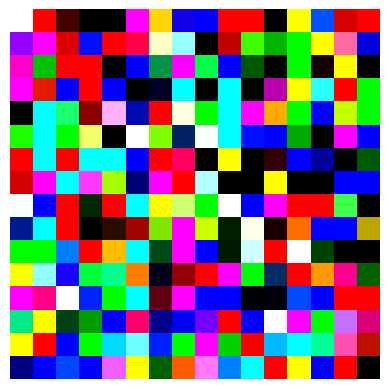

In [17]:
# Resize the patch to 16x16x3
patch = torch.reshape(patch, (16, 16, 3))
print(patch.shape)
plt.imshow(patch)
plt.axis('off')
plt.show()

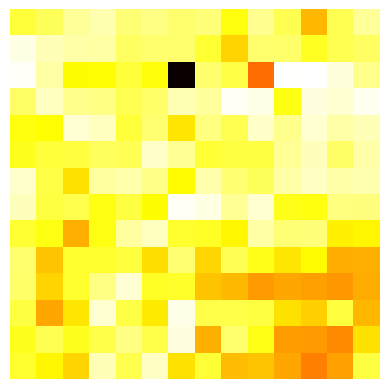

In [22]:
# Take the dot product of features[:, 0] with features[:, 1, 2, ..., 196]
import numpy as np
dot_product = np.zeros((14, 14))
for i in range(14):
    for j in range(14):
        dot_product[i, j] = torch.dot(features_vit[:, 0].flatten(), features_vit[:, 1 + i * 14 + j].flatten()).item()

plt.imshow(dot_product, cmap='hot', interpolation='nearest')
plt.axis('off')
plt.show()

In [24]:
# Extract intermediate features
with torch.no_grad():
    output, interm_features_vit = model_vit.forward_intermediates(image_tensor)

In [25]:
for i, o in enumerate(interm_features_vit):
    print(f"Layer {i}: {o.shape}")

Layer 0: torch.Size([1, 768, 14, 14])
Layer 1: torch.Size([1, 768, 14, 14])
Layer 2: torch.Size([1, 768, 14, 14])
Layer 3: torch.Size([1, 768, 14, 14])
Layer 4: torch.Size([1, 768, 14, 14])
Layer 5: torch.Size([1, 768, 14, 14])
Layer 6: torch.Size([1, 768, 14, 14])
Layer 7: torch.Size([1, 768, 14, 14])
Layer 8: torch.Size([1, 768, 14, 14])
Layer 9: torch.Size([1, 768, 14, 14])
Layer 10: torch.Size([1, 768, 14, 14])
Layer 11: torch.Size([1, 768, 14, 14])


### VGG model

In [26]:
model_vgg = timm.create_model('vgg16', pretrained=True)

In [27]:
# Extract intermediate features
with torch.no_grad():
    output, interm_features_vgg = model_vgg.forward_intermediates(image_tensor)

AttributeError: 'VGG' object has no attribute 'forward_intermediates'

In [28]:
# Extract final features
with torch.no_grad():
    features_vgg = model_vgg.forward_features(image_tensor)

In [29]:
features_vgg.shape

torch.Size([1, 512, 7, 7])

In [32]:
512*7*7 == 224**2

False

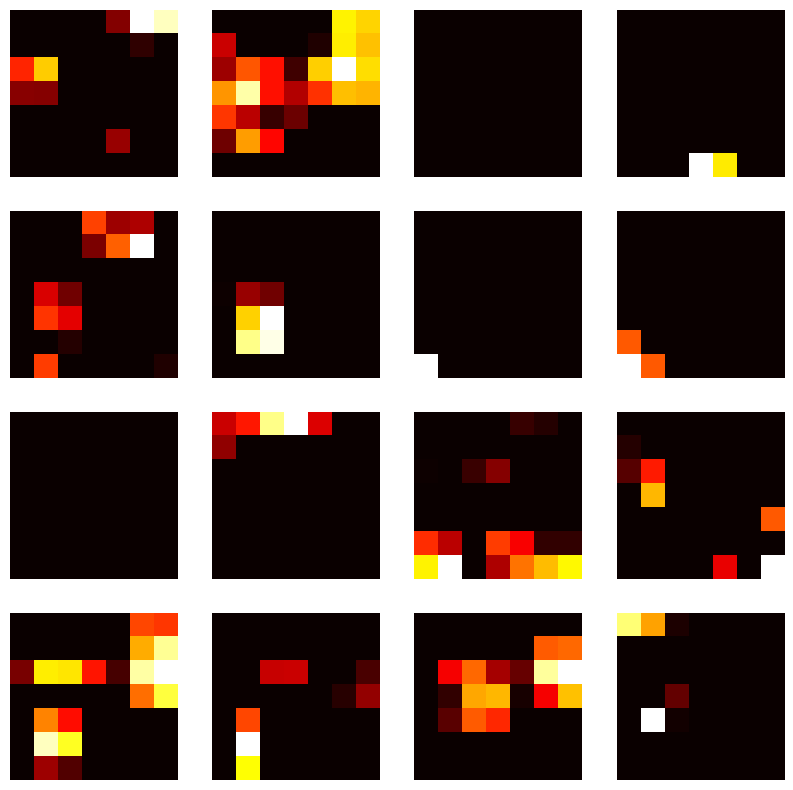

In [33]:
# Creata a 4x4 grid of output features subplot
features_plot = features_vgg[0, :16, :, :].numpy()
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(features_plot[i * 4 + j], cmap='hot', interpolation='nearest')
        ax[i, j].axis('off')
plt.show()